### Bước 1: Cài đặt các thư viện

In [30]:
!pip install geopandas
!pip install folium
!pip install osmnet
!pip install rtree
!pip install pygeos
!pip install geojson

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 127 kB 5.3 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.12
    Uninstalling urllib3-1.26.12:
      Successfully uninstalled urllib3-1.26.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.5.0 requires urllib3[socks]~=1.26, but you have urllib3 1.25.11 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
import geopandas as gpd
import folium
import osmnet
import rtree
import pygeos
import geojson
import matplotlib
import pandas as pd
import json
import matplotlib.pyplot as plt

### Bước 2: Clone data từ 'https://github.com/CityScope/CSL_HCMC'

In [33]:
!git clone https://github.com/CityScope/CSL_HCMC

fatal: destination path 'CSL_HCMC' already exists and is not an empty directory.


### Bước 3: Load ranh giới quận huyện và dân số quận huyện

In [34]:
# Load ranh giới quận huyện và dân số quận huyện
data = gpd.read_file('CSL_HCMC/Data/GIS/Population/population_HCMC/population_shapefile/Population_District_Level.shp')
data.head()

,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,...,Den_2012,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry
0,District 1,760,District,180225.0,187435.0,187419.0,190943.0,197421.0,200297.0,193632.0,...,24749.60,25589.30,25962.10,25098.20,27022.1,27377.90,18486.8,15274.835115,7.714899e+06,"POLYGON ((684948.318 1193882.223, 684971.256 1..."
1,District 3,770,District,190553.0,188945.0,190631.0,191580.0,193206.0,193694.0,196333.0,...,38897.10,39227.20,39326.30,39862.10,40221.7,40422.90,38652.5,12182.058264,4.925215e+06,"POLYGON ((684382.122 1193521.050, 684410.753 1..."
2,District 4,773,District,180980.0,183261.0,184711.0,185649.0,185808.0,187157.0,186727.0,...,44428.40,44466.50,44789.30,44686.40,44750.6,44008.40,41958.7,9483.716891,4.178668e+06,"POLYGON ((687625.438 1189132.516, 687615.280 1..."
3,District 6,775,District,249329.0,253474.0,254212.0,257865.0,266121.0,257183.0,258945.0,...,36105.70,37261.60,36010.20,36256.90,36508.5,36790.60,32702.7,13077.365262,7.140945e+06,"POLYGON ((679534.413 1187518.498, 679077.904 1..."
4,District 7,778,District,244276.0,274828.0,268483.0,266633.0,280743.0,296757.0,310178.0,...,7563.59,7963.85,8418.12,8798.84,9006.2,9282.35,10216.5,33260.915360,3.525220e+07,"POLYGON ((691506.715 1190058.151, 691359.893 1..."


In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Bước 4: Load những dữ liệu click của người dùng

In [36]:
# Load những dữ liệu click của người dùng

data_click = gpd.read_file('/content/drive/MyDrive/Python-máy-học/click_data.json')
data_click.head(10)


,dbh,geometry
0,1,POINT (106.71136 10.85113)
1,1,POINT (106.71695 10.74449)
2,1,POINT (106.66315 10.83289)
3,1,POINT (106.66267 10.83339)
4,1,POINT (106.65977 10.83729)
5,1,POINT (106.75131 10.85530)
6,1,POINT (106.66677 10.79108)
7,1,POINT (106.68205 10.82357)
8,1,POINT (106.73263 10.74918)
9,1,POINT (106.73554 10.72743)


### Bước 5: Loc ra 10 quận huyện có tốc độ tăng trưởng MẬT ĐỘ dân số nhanh nhất ( dùng 2019 và 2017 )

In [37]:
# Loc ra 10 quận huyện có tốc độ tăng trưởng MẬT ĐỘ dân số nhanh nhất ( dùng 2019 và 2017 )

data['MAT_DO'] = data['Den_2019'] / data['Den_2017']
data_10 = data.nlargest(10, 'MAT_DO')
data_10


,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,...,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry,MAT_DO
16,District 9,763,District,256257.0,263486.0,271537.0,276432.0,284473.0,284990.0,290620.0,...,2489.700,2494.230,2543.500,2592.320,2719.580,3474.59,53139.220230,1.142649e+08,"POLYGON ((701125.957 1205414.891, 701162.391 1...",1.277620
23,Hoc Mon,784,District,349065.0,358640.0,366502.0,396763.0,408683.0,414795.0,422471.0,...,3743.180,3799.160,3869.460,3977.580,4085.480,4966.47,65955.793966,1.091744e+08,"POLYGON ((673061.206 1208548.077, 673094.550 1...",1.215639
18,Nha Be,786,District,101074.0,103793.0,110958.0,119416.0,126062.0,132034.0,139225.0,...,1254.480,1313.900,1385.460,1552.410,1771.220,2058.29,67540.905029,1.004901e+08,"POLYGON ((688444.826 1185726.125, 688568.759 1...",1.162075
22,District 12,761,District,405360.0,427083.0,455881.0,475824.0,489511.0,499569.0,510326.0,...,9275.440,9466.020,9669.850,9968.060,10403.900,11750.80,47703.394094,5.277342e+07,"POLYGON ((685183.891 1205265.848, 685198.395 1...",1.129461
17,District 2,769,District,147490.0,140621.0,137749.0,134131.0,140436.0,140288.0,147168.0,...,2812.210,2809.250,2947.020,3080.460,3243.160,3609.98,39592.970451,4.993869e+07,"POLYGON ((690496.729 1195354.084, 690716.888 1...",1.113106
13,Cu Chi,783,District,343155.0,355822.0,365779.0,381796.0,383981.0,390722.0,403038.0,...,883.272,898.778,927.109,945.387,963.033,1062.85,119954.769999,4.346845e+08,"POLYGON ((656983.014 1228510.664, 656969.299 1...",1.103649
4,District 7,778,District,244276.0,274828.0,268483.0,266633.0,280743.0,296757.0,310178.0,...,7963.850,8418.120,8798.840,9006.200,9282.350,10216.50,33260.915360,3.525220e+07,"POLYGON ((691506.715 1190058.151, 691359.893 1...",1.100637
15,Thu Duc,762,District,442177.0,455899.0,478900.0,500850.0,507650.0,517772.0,528413.0,...,10630.200,10842.200,11065.000,11245.900,11362.300,12410.90,52828.501430,4.775581e+07,"POLYGON ((688796.063 1204383.598, 688818.721 1...",1.092288
14,Binh Chanh,785,District,420109.0,447291.0,469517.0,491900.0,514242.0,551545.0,591451.0,...,2033.120,2180.610,2338.380,2463.200,2581.330,2789.32,129933.645113,2.529152e+08,"POLYGON ((679646.388 1186348.769, 679698.864 1...",1.080575
12,Binh Tan,777,District,572132.0,595335.0,616777.0,639088.0,655244.0,672309.0,686474.0,...,12621.800,12950.500,13223.300,13567.600,14049.500,15105.30,40057.584063,5.191097e+07,"POLYGON ((674953.073 1197210.125, 674961.146 1...",1.075149


### Bước 6: Dùng spatial join (trong geopandas.tools import sjoin) để lọc ra các điểm click của người dùng trong 5 quận huyện hot nhất

In [38]:
from geopandas.tools import sjoin
data_click.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [39]:
data_10 = data_10.to_crs(4326)
data_10.head()

,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,...,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry,MAT_DO
16,District 9,763,District,256257.0,263486.0,271537.0,276432.0,284473.0,284990.0,290620.0,...,2489.70,2494.23,2543.50,2592.32,2719.58,3474.59,53139.220230,1.142649e+08,"POLYGON ((106.84015 10.89893, 106.84048 10.897...",1.277620
23,Hoc Mon,784,District,349065.0,358640.0,366502.0,396763.0,408683.0,414795.0,422471.0,...,3743.18,3799.16,3869.46,3977.58,4085.48,4966.47,65955.793966,1.091744e+08,"POLYGON ((106.58361 10.92869, 106.58391 10.928...",1.215639
18,Nha Be,786,District,101074.0,103793.0,110958.0,119416.0,126062.0,132034.0,139225.0,...,1254.48,1313.90,1385.46,1552.41,1771.22,2058.29,67540.905029,1.004901e+08,"POLYGON ((106.72315 10.72162, 106.72428 10.721...",1.162075
22,District 12,761,District,405360.0,427083.0,455881.0,475824.0,489511.0,499569.0,510326.0,...,9275.44,9466.02,9669.85,9968.06,10403.90,11750.80,47703.394094,5.277342e+07,"POLYGON ((106.69433 10.89842, 106.69446 10.897...",1.129461
17,District 2,769,District,147490.0,140621.0,137749.0,134131.0,140436.0,140288.0,147168.0,...,2812.21,2809.25,2947.02,3080.46,3243.16,3609.98,39592.970451,4.993869e+07,"POLYGON ((106.74241 10.80855, 106.74442 10.808...",1.113106


In [40]:
print(data_click.crs)
print(data_10.crs)

epsg:4326
epsg:4326


In [41]:
click_top10 = sjoin(data_click, data_10, how='left', op='within');
click_top10 = click_top10.dropna()
click_top10

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,dbh,geometry,index_right,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,...,Den_2012,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,MAT_DO
0,1,POINT (106.71136 10.85113),15.0,Thu Duc,762,District,442177.0,455899.0,478900.0,500850.0,...,10487.80,10630.20,10842.20,11065.00,11245.9,11362.30,12410.9,52828.50143,4.775581e+07,1.092288
1,1,POINT (106.71695 10.74449),4.0,District 7,778,District,244276.0,274828.0,268483.0,266633.0,...,7563.59,7963.85,8418.12,8798.84,9006.2,9282.35,10216.5,33260.91536,3.525220e+07,1.100637
5,1,POINT (106.75131 10.85530),15.0,Thu Duc,762,District,442177.0,455899.0,478900.0,500850.0,...,10487.80,10630.20,10842.20,11065.00,11245.9,11362.30,12410.9,52828.50143,4.775581e+07,1.092288
8,1,POINT (106.73263 10.74918),4.0,District 7,778,District,244276.0,274828.0,268483.0,266633.0,...,7563.59,7963.85,8418.12,8798.84,9006.2,9282.35,10216.5,33260.91536,3.525220e+07,1.100637
9,1,POINT (106.73554 10.72743),4.0,District 7,778,District,244276.0,274828.0,268483.0,266633.0,...,7563.59,7963.85,8418.12,8798.84,9006.2,9282.35,10216.5,33260.91536,3.525220e+07,1.100637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83667,1,POINT (106.76304 10.84689),15.0,Thu Duc,762,District,442177.0,455899.0,478900.0,500850.0,...,10487.80,10630.20,10842.20,11065.00,11245.9,11362.30,12410.9,52828.50143,4.775581e+07,1.092288
83668,1,POINT (106.70446 10.74370),4.0,District 7,778,District,244276.0,274828.0,268483.0,266633.0,...,7563.59,7963.85,8418.12,8798.84,9006.2,9282.35,10216.5,33260.91536,3.525220e+07,1.100637
83669,1,POINT (106.71027 10.74153),4.0,District 7,778,District,244276.0,274828.0,268483.0,266633.0,...,7563.59,7963.85,8418.12,8798.84,9006.2,9282.35,10216.5,33260.91536,3.525220e+07,1.100637
83671,1,POINT (106.75180 10.85276),15.0,Thu Duc,762,District,442177.0,455899.0,478900.0,500850.0,...,10487.80,10630.20,10842.20,11065.00,11245.9,11362.30,12410.9,52828.50143,4.775581e+07,1.092288


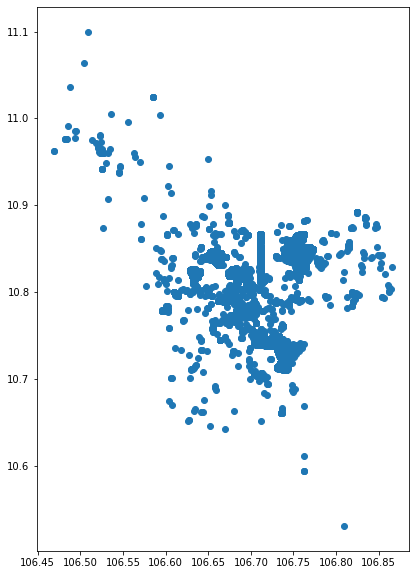

In [42]:
data_click.plot(figsize=(10,10))

### Bước 7: Chạy Kmean cho top 5 quận huyện này. Lấy K = 20

In [43]:
from sklearn.cluster import KMeans
import numpy as np 

def kmeans(data_frame, par1, par2='geometry', n_clusters=20):
    table = data_frame[data_frame.Dist_Name == par1]
    kmeans = KMeans(n_clusters) 
    x = pd.Series(table[par2].apply(lambda p: p.x)) 
    y = pd.Series(table[par2].apply(lambda p: p.y)) 
    point = np.column_stack((x, y)) 
    y_means = kmeans.fit_predict(point) 
    table['cluster'] = y_means 
    return table

In [44]:
district_1 = kmeans(click_top10, 'District 9', 'geometry', 20)
district_2 = kmeans(click_top10, 'Hoc Mon', 'geometry', 20)
district_3 = kmeans(click_top10, 'Nha Be', 'geometry', 20)
district_4 = kmeans(click_top10, 'District 12', 'geometry', 20)
district_5 = kmeans(click_top10, 'District 2', 'geometry', 20)
district_6 = kmeans(click_top10, 'Cu Chi', 'geometry', 20)
district_7 = kmeans(click_top10, 'District 7', 'geometry', 20)
district_8 = kmeans(click_top10, 'Thu Duc', 'geometry', 20)
district_9 = kmeans(click_top10, 'Binh Chanh', 'geometry', 20)
district_10 = kmeans(click_top10, 'Binh Tan', 'geometry', 20)

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

### Bước 8: Lưu 1 cụm điểm nhiều nhất trong các quận huyện ở Bước 5

In [45]:
index_1 = district_1['cluster'].value_counts().idxmax()
index_2 = district_2['cluster'].value_counts().idxmax()
index_3 = district_3['cluster'].value_counts().idxmax()
index_4 = district_4['cluster'].value_counts().idxmax()
index_5 = district_5['cluster'].value_counts().idxmax()
index_6 = district_6['cluster'].value_counts().idxmax()
index_7 = district_7['cluster'].value_counts().idxmax()
index_8 = district_8['cluster'].value_counts().idxmax()
index_9 = district_9['cluster'].value_counts().idxmax()
index_10 = district_10['cluster'].value_counts().idxmax()

In [46]:
cluster_data = dict()
cluster_data['District 9'] = district_1.where(district_1['cluster'] == index_1).dropna()
cluster_data['Hoc Mon'] = district_2.where(district_2['cluster'] == index_2).dropna()
cluster_data['Nha Be'] = district_3.where(district_3['cluster'] == index_3).dropna()
cluster_data['District 12'] = district_4.where(district_4['cluster'] == index_4).dropna()
cluster_data['District 2'] = district_5.where(district_5['cluster'] == index_5).dropna()
cluster_data['Cu Chi'] = district_6.where(district_6['cluster'] == index_6).dropna()
cluster_data['District 7'] = district_7.where(district_7['cluster'] == index_7).dropna()
cluster_data['Thu Duc'] = district_8.where(district_8['cluster'] == index_8).dropna()
cluster_data['Binh Chanh'] = district_9.where(district_9['cluster'] == index_9).dropna()
cluster_data['Binh Tan'] = district_10.where(district_10['cluster'] == index_10).dropna()

In [47]:
cluster_data['Binh Tan']

,dbh,geometry,index_right,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,...,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,MAT_DO,cluster
41660,1.0,POINT (106.61017 10.79975),12.0,Binh Tan,777,District,572132.0,595335.0,616777.0,639088.0,...,12621.8,12950.5,13223.3,13567.6,14049.5,15105.3,40057.584063,5.191097e+07,1.075149,3.0
49078,1.0,POINT (106.61004 10.79975),12.0,Binh Tan,777,District,572132.0,595335.0,616777.0,639088.0,...,12621.8,12950.5,13223.3,13567.6,14049.5,15105.3,40057.584063,5.191097e+07,1.075149,3.0
56947,1.0,POINT (106.61014 10.79976),12.0,Binh Tan,777,District,572132.0,595335.0,616777.0,639088.0,...,12621.8,12950.5,13223.3,13567.6,14049.5,15105.3,40057.584063,5.191097e+07,1.075149,3.0
57211,1.0,POINT (106.61023 10.79984),12.0,Binh Tan,777,District,572132.0,595335.0,616777.0,639088.0,...,12621.8,12950.5,13223.3,13567.6,14049.5,15105.3,40057.584063,5.191097e+07,1.075149,3.0
64779,1.0,POINT (106.60978 10.79969),12.0,Binh Tan,777,District,572132.0,595335.0,616777.0,639088.0,...,12621.8,12950.5,13223.3,13567.6,14049.5,15105.3,40057.584063,5.191097e+07,1.075149,3.0
65930,1.0,POINT (106.61014 10.79973),12.0,Binh Tan,777,District,572132.0,595335.0,616777.0,639088.0,...,12621.8,12950.5,13223.3,13567.6,14049.5,15105.3,40057.584063,5.191097e+07,1.075149,3.0
67525,1.0,POINT (106.60990 10.79968),12.0,Binh Tan,777,District,572132.0,595335.0,616777.0,639088.0,...,12621.8,12950.5,13223.3,13567.6,14049.5,15105.3,40057.584063,5.191097e+07,1.075149,3.0
77522,1.0,POINT (106.61004 10.79972),12.0,Binh Tan,777,District,572132.0,595335.0,616777.0,639088.0,...,12621.8,12950.5,13223.3,13567.6,14049.5,15105.3,40057.584063,5.191097e+07,1.075149,3.0
80447,1.0,POINT (106.61018 10.79976),12.0,Binh Tan,777,District,572132.0,595335.0,616777.0,639088.0,...,12621.8,12950.5,13223.3,13567.6,14049.5,15105.3,40057.584063,5.191097e+07,1.075149,3.0


### Bước 9: Show lên bản đồ các cụm đông nhất theo từng quận huyện theo dạng HEATMAP

In [48]:
data = []
for clu in cluster_data.values():
  x = pd.Series(clu['geometry'].apply(lambda p: p.x)) 
  y = pd.Series(clu['geometry'].apply(lambda p: p.y))
  point = np.column_stack((y, x)) 
  data = data + point.tolist()

In [49]:
from glob import glob
from folium import plugins
from folium.plugins import HeatMap

map = folium.Map([10.8, 106.7], tiles='CartoDB positron', zoom_start=10)
HeatMap(data).add_to(map)

for _, r in data_10.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    folium.Popup(r['Dist_Name']).add_to(geo_j)
    geo_j.add_to(map)
map

HeatMap(data).add_to(map)

In [50]:
map

### Bước 10: Lưu heatmap.png

In [51]:
!pip install selenium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached urllib3-1.26.12-py2.py3-none-any.whl (140 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.25.11
    Uninstalling urllib3-1.25.11:
      Successfully uninstalled urllib3-1.25.11
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.12 which is incompatible.


In [52]:
!apt-get update 
!apt install chromium-chromedriver

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [948 k

In [54]:
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('/content/drive/MyDrive/Python-máy-học/chromedriver',chrome_options=chrome_options)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: use options instead of chrome_options
  


WebDriverException: ignored

In [55]:
import os
map_path='MAP.html'
map.save(map_path)
map_URL='file://{path}/{mapfile}'.format(path=os.getcwd(), mapfile=map_path)

driver.get(map_URL)

driver.save_screenshot('map.png')
driver.quit()

NameError: ignored